In [8]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('GlobalWeatherRepository.csv')
df

,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,...,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
0,Afghanistan,Kabul,34.5200,69.1800,Asia/Kabul,1715849100,2024-05-16 13:15,26.6,79.8,Partly Cloudy,...,8.400,26.600,1,1,04:50 AM,06:50 PM,12:12 PM,01:11 AM,Waxing Gibbous,55
1,Albania,Tirana,41.3300,19.8200,Europe/Tirane,1715849100,2024-05-16 10:45,19.0,66.2,Partly cloudy,...,1.100,2.000,1,1,05:21 AM,07:54 PM,12:58 PM,02:14 AM,Waxing Gibbous,55
2,Algeria,Algiers,36.7600,3.0500,Africa/Algiers,1715849100,2024-05-16 09:45,23.0,73.4,Sunny,...,10.400,18.400,1,1,05:40 AM,07:50 PM,01:15 PM,02:14 AM,Waxing Gibbous,55
3,Andorra,Andorra La Vella,42.5000,1.5200,Europe/Andorra,1715849100,2024-05-16 10:45,6.3,43.3,Light drizzle,...,0.700,0.900,1,1,06:31 AM,09:11 PM,02:12 PM,03:31 AM,Waxing Gibbous,55
4,Angola,Luanda,-8.8400,13.2300,Africa/Luanda,1715849100,2024-05-16 09:45,26.0,78.8,Partly cloudy,...,183.400,262.300,5,10,06:12 AM,05:55 PM,01:17 PM,12:38 AM,Waxing Gibbous,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41734,Venezuela,Caracas,10.5000,-66.9167,America/Caracas,1734432300,2024-12-17 06:45,18.0,64.4,Clear,...,11.285,11.840,1,1,06:38 AM,06:09 PM,08:35 PM,08:48 AM,Waning Gibbous,96
41735,Vietnam,Hanoi,21.0333,105.8500,Asia/Bangkok,1734432300,2024-12-17 17:45,20.3,68.5,Clear,...,137.825,138.750,4,10,06:27 AM,05:19 PM,07:13 PM,08:15 AM,Waning Gibbous,98
41736,Yemen,Sanaa,15.3547,44.2067,Asia/Aden,1734432300,2024-12-17 13:45,20.7,69.2,Sunny,...,17.760,33.855,2,2,06:23 AM,05:36 PM,07:43 PM,08:17 AM,Waning Gibbous,97
41737,Zambia,Lusaka,-15.4167,28.2833,Africa/Lusaka,1734432300,2024-12-17 12:45,33.6,92.6,Sunny,...,15.910,16.465,2,2,05:32 AM,06:34 PM,08:51 PM,07:17 AM,Waning Gibbous,97


In [2]:
df.isna().sum()

country                         0
location_name                   0
latitude                        0
longitude                       0
timezone                        0
last_updated_epoch              0
last_updated                    0
temperature_celsius             0
temperature_fahrenheit          0
condition_text                  0
wind_mph                        0
wind_kph                        0
wind_degree                     0
wind_direction                  0
pressure_mb                     0
pressure_in                     0
precip_mm                       0
precip_in                       0
humidity                        0
cloud                           0
feels_like_celsius              0
feels_like_fahrenheit           0
visibility_km                   0
visibility_miles                0
uv_index                        0
gust_mph                        0
gust_kph                        0
air_quality_Carbon_Monoxide     0
air_quality_Ozone               0
air_quality_Ni

In [3]:
df.duplicated().sum()

0

In [4]:
#What are the unique countries represented in the dataset, and how many locations are included for each country?

country_counts = df['country'].value_counts()
country_counts

country
Bulgaria                            462
Indonesia                           431
Iran                                428
Madagascar                          428
Sudan                               428
                                   ... 
Kosovo                                1
Libya                                 1
Lao People's Democratic Republic      1
Colombia                              1
Jemen                                 1
Name: count, Length: 210, dtype: int64

In [5]:
#What is the average, minimum, and maximum temperature (in both Celsius and Fahrenheit) across all locations?

temp_stats = {
    'average_celsius': df['temperature_celsius'].mean(),
    'min_celsius': df['temperature_celsius'].min(),
    'max_celsius': df['temperature_celsius'].max(),
    'average_fahrenheit': df['temperature_fahrenheit'].mean(),
    'min_fahrenheit': df['temperature_fahrenheit'].min(),
    'max_fahrenheit': df['temperature_fahrenheit'].max()
}

temp_stats_df = pd.DataFrame([temp_stats])
temp_stats_df

,average_celsius,min_celsius,max_celsius,average_fahrenheit,min_fahrenheit,max_fahrenheit
0,24.017648,-22.9,49.2,75.233276,-9.2,120.6


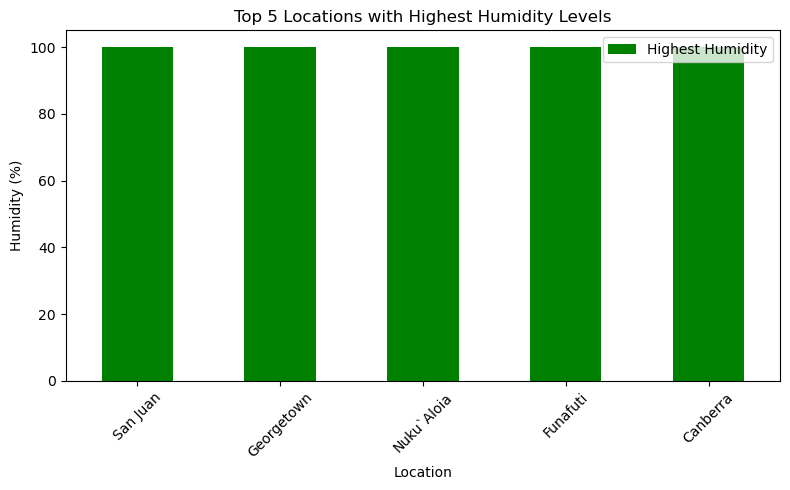

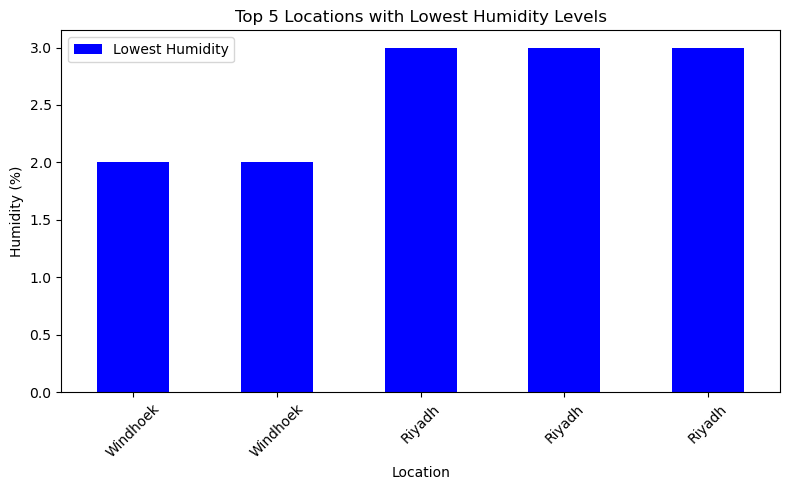

In [9]:
#Which locations have the highest and lowest humidity levels?

top_5_highest = df.nlargest(5, 'humidity')
top_5_lowest = df.nsmallest(5, 'humidity')

plt.figure(figsize=(8, 5))
top_5_highest.set_index('location_name')['humidity'].plot(kind='bar', color='green', label='Highest Humidity')
plt.title('Top 5 Locations with Highest Humidity Levels')
plt.xlabel('Location')
plt.ylabel('Humidity (%)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
top_5_lowest.set_index('location_name')['humidity'].plot(kind='bar', color='blue', label='Lowest Humidity')
plt.title('Top 5 Locations with Lowest Humidity Levels')
plt.xlabel('Location')
plt.ylabel('Humidity (%)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

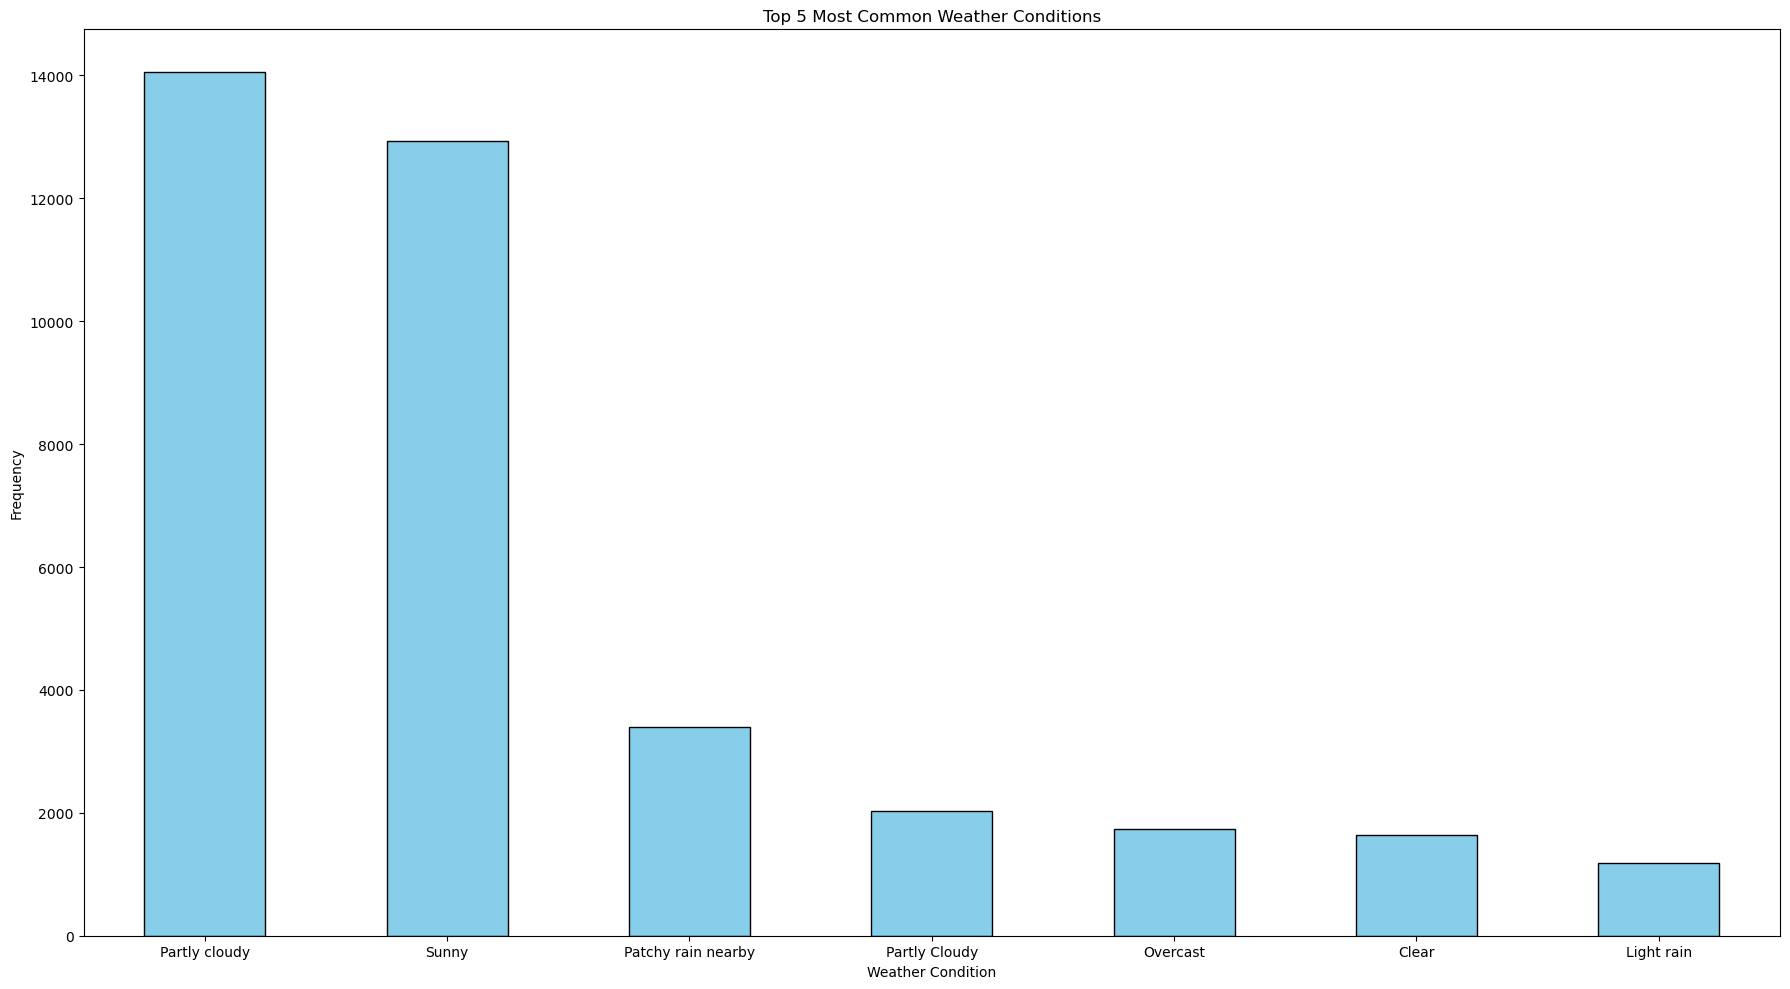

In [10]:
#What are the most common weather conditions (condition_text) observed in the dataset?

weather_type = df['condition_text'].value_counts()
plt.figure(figsize=(18, 10))
weather_type.head(7).plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Top 5 Most Common Weather Conditions')
plt.xlabel('Weather Condition')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

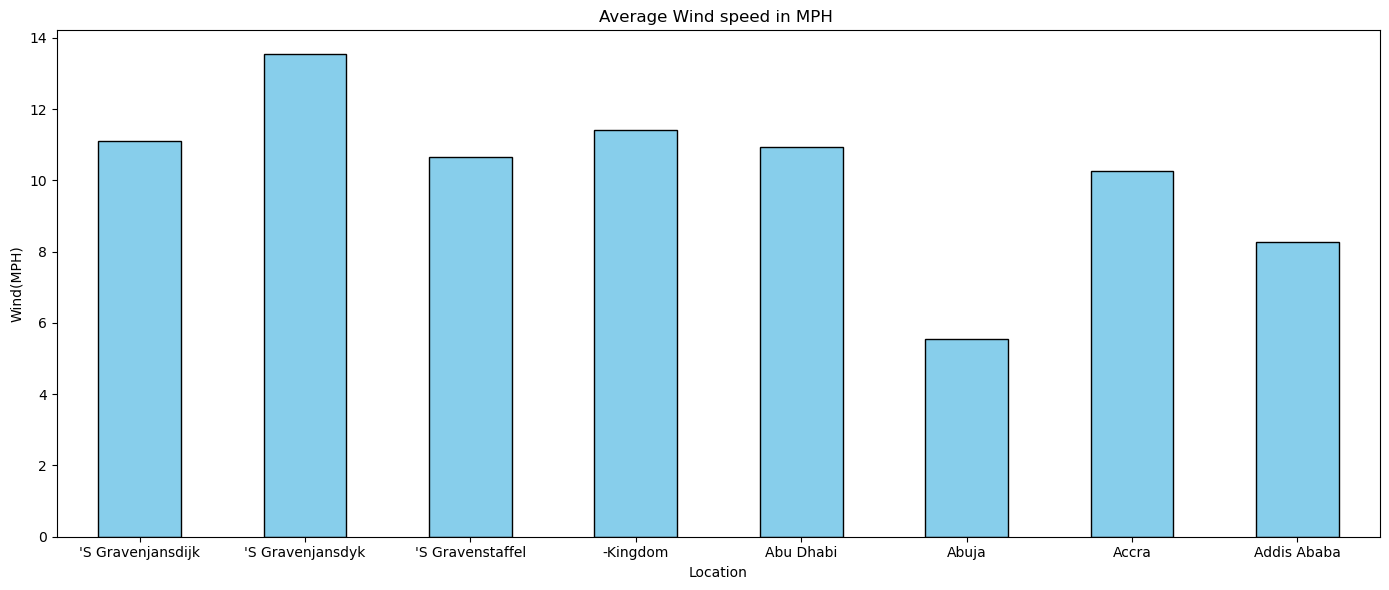

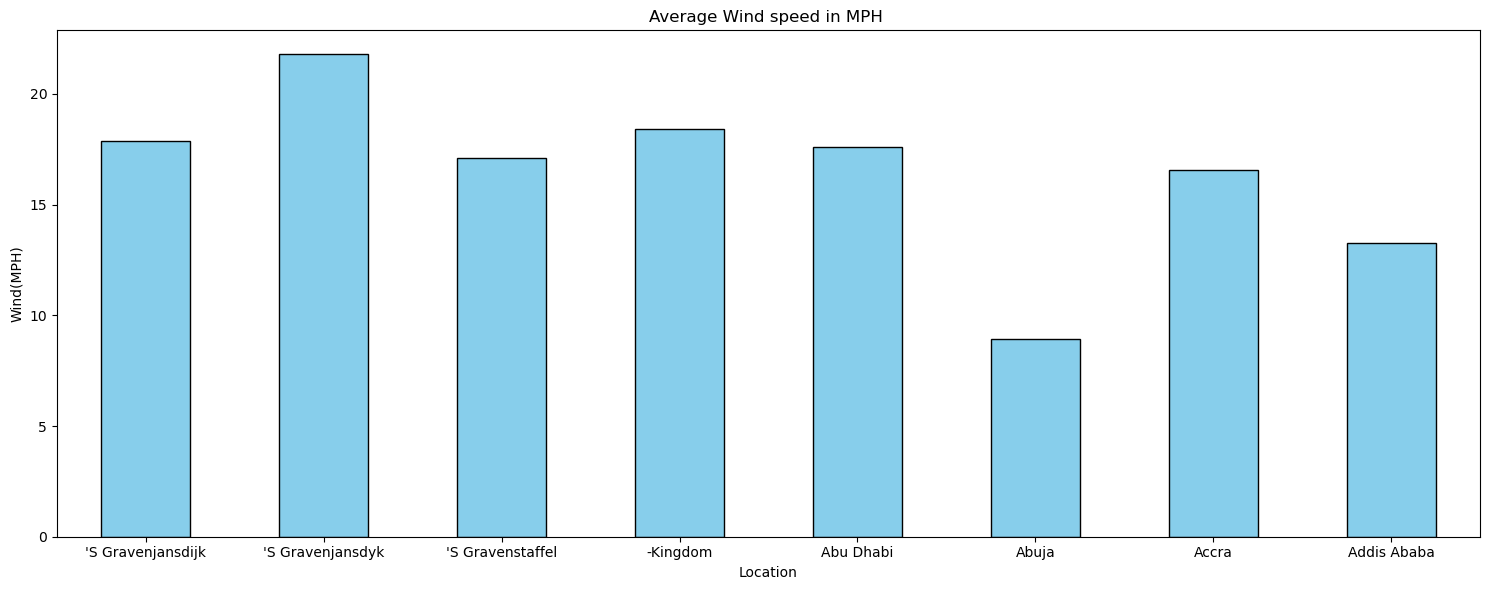

In [11]:
#How does the average wind speed (in kph and mph) vary across different locations?
wind_locmph = df.groupby('location_name')['wind_mph'].mean()
wind_lockph = df.groupby('location_name')['wind_kph'].mean()


plt.figure(figsize=(14,6))
wind_locmph.head(8).plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average Wind speed in MPH ')
plt.xlabel('Location')
plt.ylabel('Wind(MPH)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

plt.figure(figsize=(15,6))
wind_lockph.head(8).plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average Wind speed in MPH ')
plt.xlabel('Location')
plt.ylabel('Wind(MPH)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


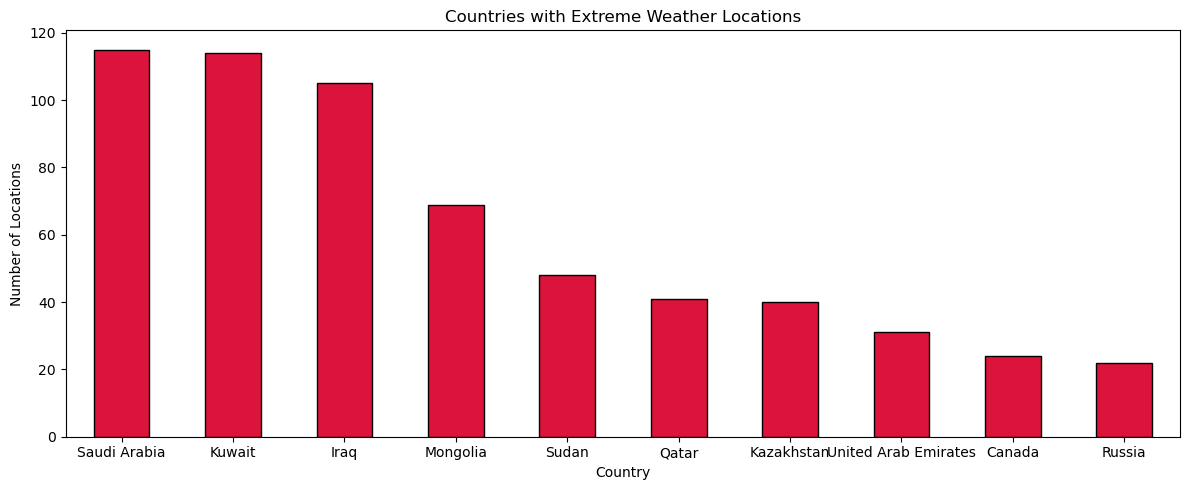

In [12]:
#Which countries have the highest number of locations with extreme weather conditions (e.g., very high or low temperatures)?

extreme_weather = df[(df['temperature_celsius'] > 40) | (df['temperature_celsius'] < 0)]
extreme_weather_count = extreme_weather.groupby('country')['location_name'].count().sort_values(ascending=False)

plt.figure(figsize=(12, 5))
extreme_weather_count.head(10).plot(kind='bar', color='crimson', edgecolor='black')
plt.title('Countries with Extreme Weather Locations')
plt.xlabel('Country')
plt.ylabel('Number of Locations')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
#How does cloud cover percentage vary across different latitudes?

#cloud_vary = df.groupby('cloud')['latitude'].value_counts()

#cloud_vary.head(5).plot(kind='bar', color='skyblue', edgecolor='black')
#plt.title('Cloud Cover Percentage by Latitudes')
#plt.xlabel('Latitude')
#plt.ylabel('Cloud')
#plt.show()

Average Cloud Cover by Latitude Bin:
latitude_bin
Temperate South    35.662313
Tropical           40.060226
Temperate North    45.707374
Polar North        33.849136
Name: cloud, dtype: float64


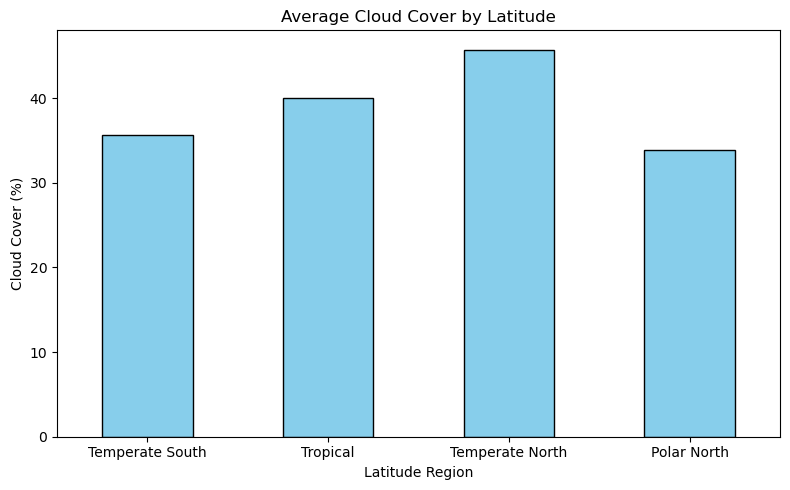

In [32]:
bins = [-50, -30, 0, 30, 65]  
labels = ['Temperate South', 'Tropical', 'Temperate North', 'Polar North'] 
df['latitude_bin'] = pd.cut(df['latitude'], bins=bins, labels=labels, right=False)

cloud_cover_by_latitude = df.groupby('latitude_bin')['cloud'].mean()
print("Average Cloud Cover by Latitude Bin:")
print(cloud_cover_by_latitude)

plt.figure(figsize=(8, 5))
cloud_cover_by_latitude.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average Cloud Cover by Latitude')
plt.xlabel('Latitude Region')
plt.ylabel('Cloud Cover (%)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

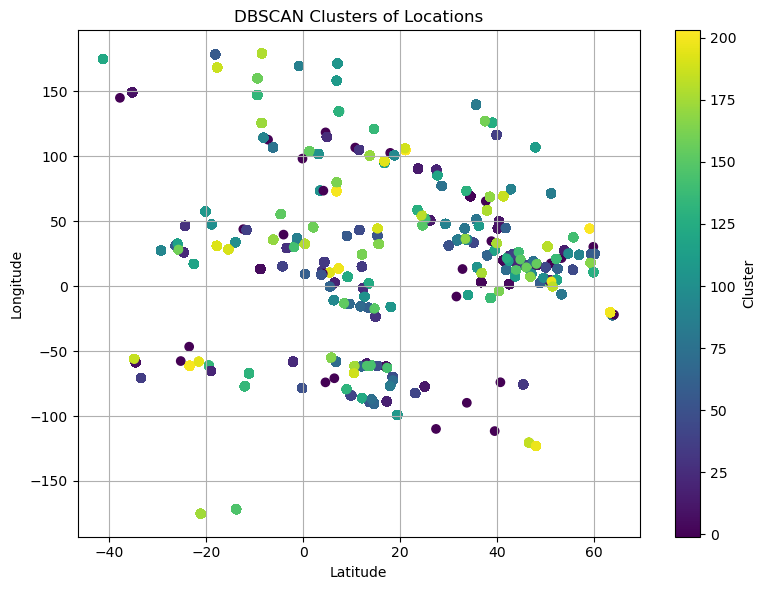

In [34]:
#Can you identify clusters of locations based on geographical coordinates (latitude and longitude)?


from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=2)
df['dbscan_cluster'] = dbscan.fit_predict(df[['latitude', 'longitude']])

plt.figure(figsize=(8, 6))
plt.scatter(df['latitude'], df['longitude'], c=df['dbscan_cluster'], cmap='viridis', marker='o')
plt.title('DBSCAN Clusters of Locations')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()

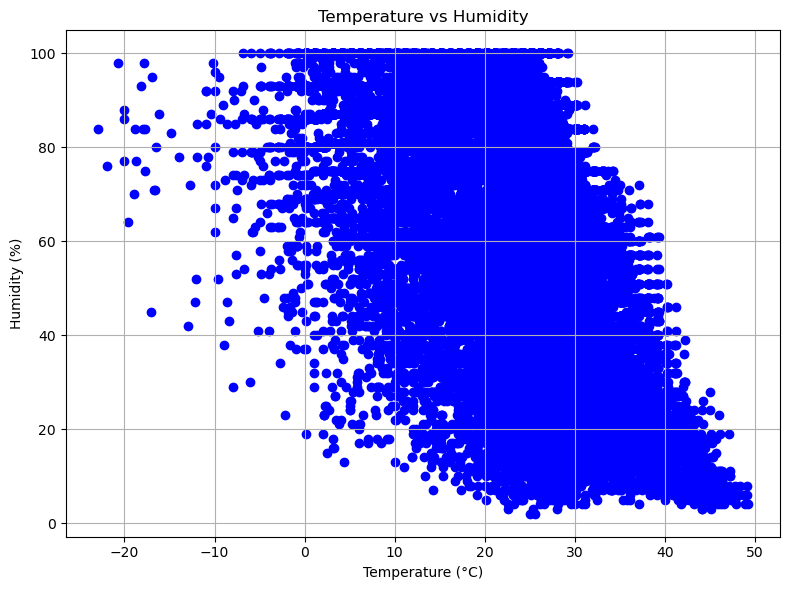

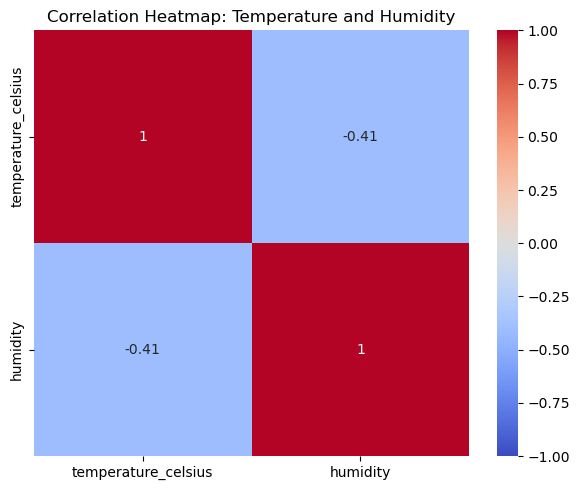

In [47]:
#What is the relationship between temperature and humidity?

import seaborn as sns
correlation = df[['temperature_celsius', 'humidity']].corr()

plt.figure(figsize=(8, 6))
plt.scatter(df['temperature_celsius'], df['humidity'], color='blue', marker='o')
plt.title('Temperature vs Humidity')
plt.xlabel('Temperature (°C)')
plt.ylabel('Humidity (%)')
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 5))
sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap: Temperature and Humidity')
plt.tight_layout()
plt.show()

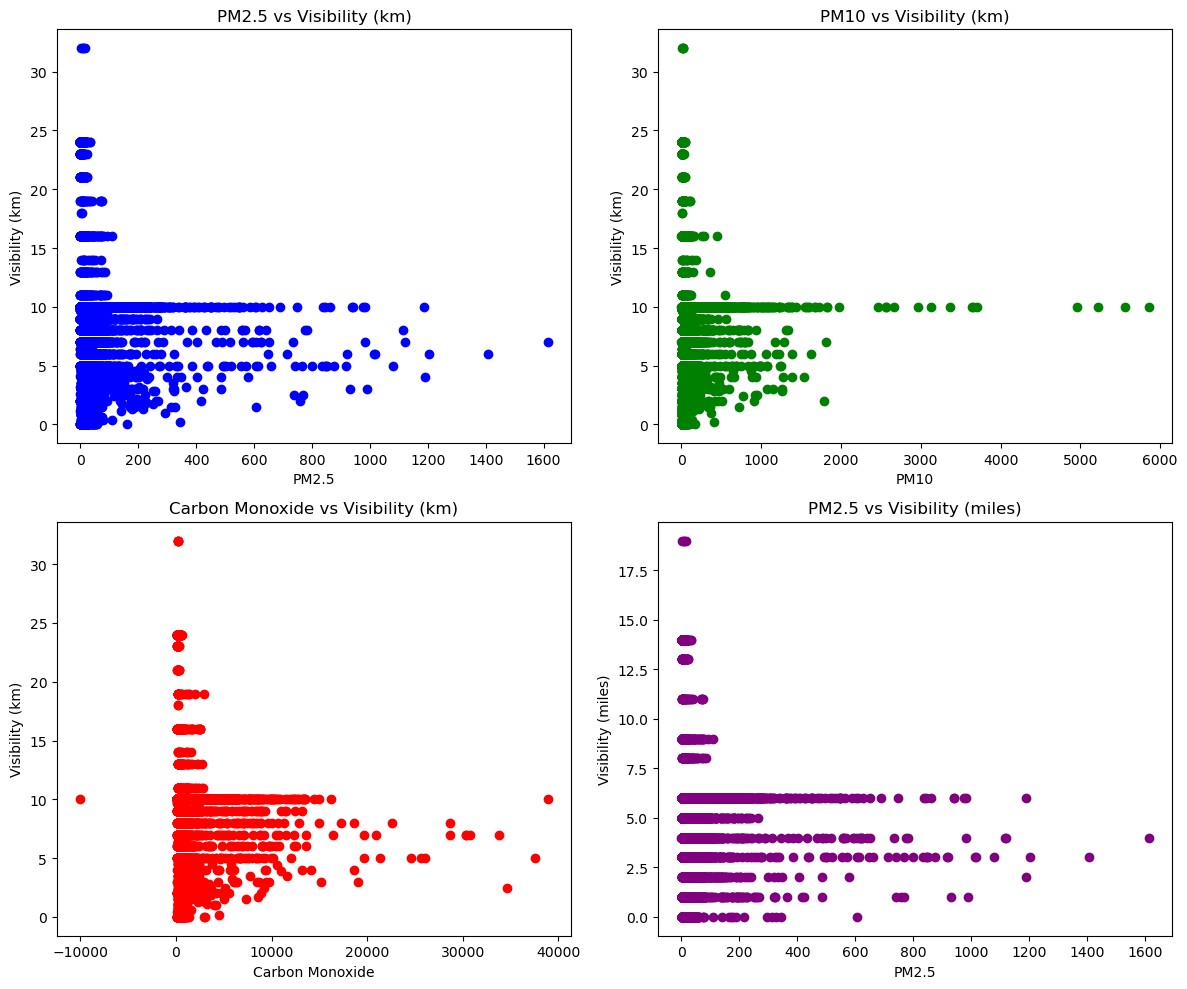

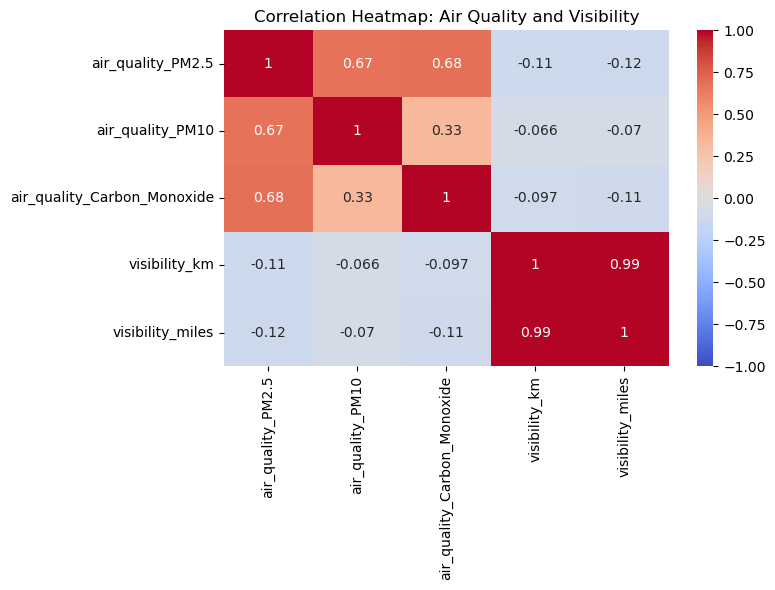

In [52]:
#Is there a significant correlation between air quality metrics (e.g., PM2.5, PM10, Carbon Monoxide)
#and visibility (in km and miles)?

correlation = df[['air_quality_PM2.5', 'air_quality_PM10', 'air_quality_Carbon_Monoxide', 'visibility_km', 'visibility_miles']].corr()
correlation
# Scatter plots to visualize the relationship between air quality metrics and visibility
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# PM2.5 vs visibility (km)
axs[0, 0].scatter(df['air_quality_PM2.5'], df['visibility_km'], color='blue', marker='o')
axs[0, 0].set_title('PM2.5 vs Visibility (km)')
axs[0, 0].set_xlabel('PM2.5')
axs[0, 0].set_ylabel('Visibility (km)')

# PM10 vs visibility (km)
axs[0, 1].scatter(df['air_quality_PM10'], df['visibility_km'], color='green', marker='o')
axs[0, 1].set_title('PM10 vs Visibility (km)')
axs[0, 1].set_xlabel('PM10')
axs[0, 1].set_ylabel('Visibility (km)')

# Carbon Monoxide vs visibility (km)
axs[1, 0].scatter(df['air_quality_Carbon_Monoxide'], df['visibility_km'], color='red', marker='o')
axs[1, 0].set_title('Carbon Monoxide vs Visibility (km)')
axs[1, 0].set_xlabel('Carbon Monoxide')
axs[1, 0].set_ylabel('Visibility (km)')

# PM2.5 vs visibility (miles)
axs[1, 1].scatter(df['air_quality_PM2.5'], df['visibility_miles'], color='purple', marker='o')
axs[1, 1].set_title('PM2.5 vs Visibility (miles)')
axs[1, 1].set_xlabel('PM2.5')
axs[1, 1].set_ylabel('Visibility (miles)')

plt.tight_layout()
plt.show()

# Heatmap for correlation between air quality metrics and visibility
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap: Air Quality and Visibility')
plt.tight_layout()
plt.show()

Model Evaluation Metrics:
Mean Absolute Error: 1.3534891057529308
Mean Squared Error: 3.372223661364467
R-squared: 0.9663813318656453


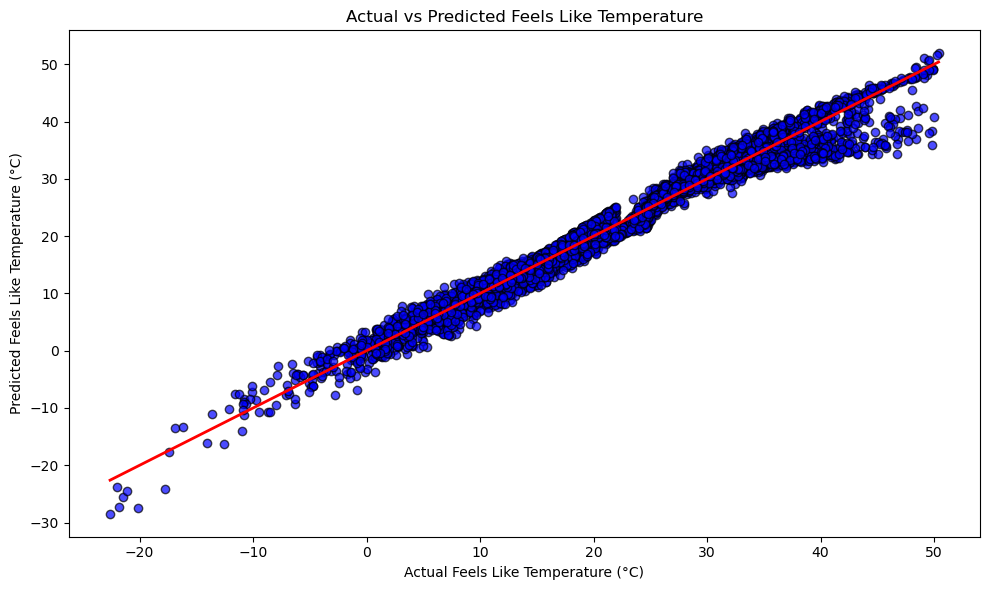

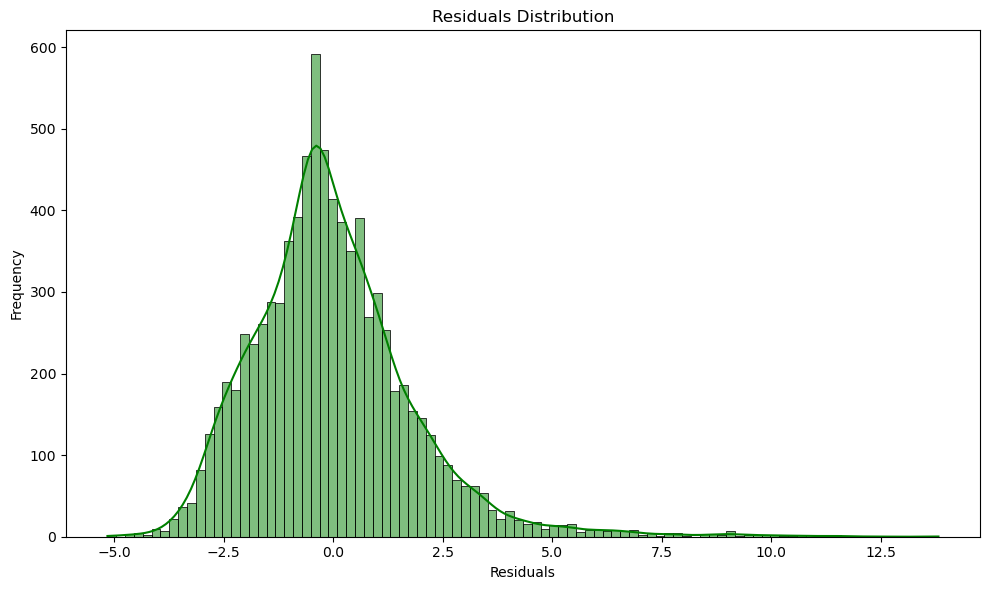

In [54]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

features = ['temperature_celsius', 'humidity', 'wind_mph', 'cloud']
target = 'feels_like_celsius'

# Remove rows with missing values
df_clean = df[features + [target]].dropna()

# Split the dataset into features (X) and target (y)
X = df_clean[features]
y = df_clean[target]

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Evaluation Metrics:")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Visualize the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='black', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)
plt.title('Actual vs Predicted Feels Like Temperature')
plt.xlabel('Actual Feels Like Temperature (°C)')
plt.ylabel('Predicted Feels Like Temperature (°C)')
plt.tight_layout()
plt.show()

# Visualize residuals
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color='green')
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [55]:
example_data = pd.DataFrame({
    'temperature_celsius': [70],  
    'humidity': [60],            
    'wind_mph': [10],              
    'cloud': [50]                 
})

predicted_feels_like = model.predict(example_data)
print(f"Actual Feels Like Temperature = 70°C")
print(f"Predicted Feels Like Temperature = {predicted_feels_like[0]:.2f}°C")

Actual Feels Like Temperature = 70°C
Predicted Feels Like Temperature = 81.91°C


In [56]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

high_air_quality_threshold = 50  
low_air_quality_threshold = 100 

def classify_air_quality(row):
    if row['air_quality_PM2.5'] <= high_air_quality_threshold and row['air_quality_PM10'] <= high_air_quality_threshold:
        return 'High'
    elif row['air_quality_PM2.5'] >= low_air_quality_threshold or row['air_quality_PM10'] >= low_air_quality_threshold:
        return 'Low'
    else:
        return 'High'  

df['air_quality_category'] = df.apply(classify_air_quality, axis=1)

le = LabelEncoder()
df['air_quality_category_encoded'] = le.fit_transform(df['air_quality_category'])

features = ['air_quality_PM2.5', 'air_quality_PM10', 'air_quality_Carbon_Monoxide', 'air_quality_Nitrogen_dioxide']
target = 'air_quality_category_encoded'

df_clean = df[features + [target]].dropna()

X = df_clean[features]
y = df_clean[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")

Classification Report:
              precision    recall  f1-score   support

        High       1.00      1.00      1.00      7637
         Low       1.00      1.00      1.00       711

    accuracy                           1.00      8348
   macro avg       1.00      1.00      1.00      8348
weighted avg       1.00      1.00      1.00      8348

Accuracy: 1.00
